In [1]:
#Import necessary librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#CRISP-DM Step1: Business Understanding - NHTSA Recalls Dataset

#What is the NHTSA?
    #"The National Highway Traffic Safety Administration (NHTSA, pronounced "NITZ-ah") 
    #is an agency of the U.S. federal government, part of the Department of Transportation.
    #It describes its mission as "Save lives, prevent injuries, reduce vehicle-related crashes"
    #related to transportation safety in the United States."
    #Source: https://en.wikipedia.org/wiki/National_Highway_Traffic_Safety_Administration

    
#What is a Recall?
    #"A product recall is a request from a manufacturer to return a product after the discovery of safety issues 
    #or product defects that might endanger the consumer or put the maker/seller at risk of legal action."
    #https://en.wikipedia.org/wiki/Product_recall
    
    #Note: In this context it is meant in regards to vehicle recalls in the United States, where specific rules apply.
    
#What is the NHTSA Recalls Dataset?
    #'Manufacturers who determine that a product or piece of original equipment either has a safety defect, 
    #or is not in compliance with federal safety standards, are required to notify NHTSA within five business days. 
    #NHTSA requires that manufacturers file a defect and noncompliance report as well as quarterly recall status reports, 
    #in compliance with Federal Regulation 49 (the National Traffic and Motor Safety Act) Part 573, 
    #which identifies the requirements for safety recalls. NHTSA stores this information and the data can be used to search 
    #for recall information related to specific NHTSA campaigns and product types.''
    #Source: https://www.nhtsa.gov/nhtsa-datasets-and-apis


#The NHTSA Recalls Dataset is regularly updated and contains all filed recalls of road vehicles and equipment since 1966.
#Since 1977 additional information about the recalls is included in the dataset in the column #Recall description' therefore
#the dataset is filtered to include only entries since 1977.
#The current version of the dataset can be downloaded on the NHTSA web-page as CSV or requested through API connection.
#For this analysis a local copy of the dataset is used - download date: 2021-Aug-09


#The following analysis tries to answere some basic questions about the data:
    
    #1. Question: What are the Top3 biggest recalls by number of affected vehicles?
    
    #2. Question: How many software related recalls happen and how does it compare over time?
    
    #3. Question: How does the performance of different passenger vehicle manufacturers adjusted by their market share?



In [3]:
df = pd.read_csv('./Data/Recalls_Data.csv')

In [4]:
df.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action
0,08/05/2021,21V610000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Tiffin Motorhomes, Inc.",Frame Rail Hitch Extensions May Fail,TRAILER HITCHES,WAY-101,Vehicle,NaN,"Tiffin Motorhomes, Inc. (Tiffin) is recalling ...",Extension failure can cause the hitch to detac...,The remedy is still under development. Owner ...
1,08/04/2021,21V603000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Lamborghini (Automobili Lamborghini),Seat Belt Locking Retractor Malfunction/FMVSS 208,SEAT BELTS,L636-R.04.21,Vehicle,224.0,Lamborghini (Automobili Lamborghini) is recall...,An unsecured child restraint system can increa...,"Dealers will inspect, and replace as necessary..."
2,08/03/2021,21E070000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Bendix Commercial Vehicle Systems, LLC",Parking Brake May Fail To Activate,PARKING BRAKE,NR (Not Reported),Equipment,431.0,"Bendix Commercial Vehicle Systems, LLC (Bendix...",Unintentional vehicle movement can increase th...,"Dealers will update the software, or replace t..."
3,08/02/2021,21V595000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Volkswagen Group of America, Inc.",Glove Box May Interfere With Knee Air Bag,AIR BAGS,68H6,Vehicle,58.0,"Volkswagen Group of America, Inc. (Volkswagen)...",An air bag that does not deploy properly can i...,"Dealers will inspect the glove box, and secure..."
4,08/02/2021,21V598000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"BMW of North America, LLC",Loss of Braking Assist,ENGINE,NR (Not Reported),Vehicle,50024.0,"BMW of North America, LLC (BMW) is recalling c...",Loss of braking assist can increase the risk o...,Dealers will update the engine management soft...


In [5]:
#CRISP-DM Step2: Get data understanding
df.shape

(25081, 12)

In [6]:
#Data Understanding of numeric column: Potentially Affected (number of vehicles recalled)
df.describe()

,Potentially Affected
count,2.503300e+04
mean,4.749766e+04
std,3.936530e+05
min,0.000000e+00
25%,1.060000e+02
50%,7.220000e+02
75%,6.540000e+03
max,3.200000e+07


In [7]:
#Read in CSV File with market share of largest manufacturer + Tesla

#Sources: 
    #1961-2016 Data: https://knoema.com/infographics/floslle/top-vehicle-manufacturers-in-the-us-market-1961-2016
    #2017-2020 Data: Various SEC Filings, Sales reports published by companies directly or linked on https://www.best-selling-cars.com/usa-car-sales-by-brand/
    
df_marketshare = pd.read_csv('./Data/US Marketshare.csv', sep=',')
df_marketshare.head(18)

,Manufacturer,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,"General Motors, LLC",19.10,17.42,16.82,16.91,17.03,17.27,17.41,17.54,17.56,...,38.93,45.79,45.96,48.93,47.53,49.59,48.12,49.67,50.72,45.71
1,Ford Motor Company,12.46,14.55,14.46,16.72,14.64,14.64,14.72,15.70,15.22,...,28.32,26.26,25.97,23.89,27.37,26.76,26.57,25.77,26.77,29.26
2,Toyota Motor Engineering & Manufacturing,14.51,13.51,15.98,15.47,13.78,14.07,14.13,14.13,14.13,...,2.04,1.13,0.63,0.39,0.20,0.06,0.00,0.00,0.00,0.00
3,"Chrysler (FCA US, LLC)",12.43,13.30,12.73,11.60,12.56,12.62,12.49,11.33,11.12,...,14.92,14.13,15.23,15.22,14.74,14.25,13.33,12.05,9.56,10.37
4,Honda (American Honda Motor Co.),10.83,9.11,8.93,8.96,9.17,8.89,9.14,9.60,9.63,...,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,"Nissan North America, Inc.",6.14,8.12,8.51,8.98,8.76,8.32,8.23,7.86,7.72,...,1.52,0.79,0.51,0.46,0.28,0.17,0.00,0.00,0.00,0.00
6,Hyundai Motor America,4.25,4.16,3.86,3.86,4.34,4.27,4.30,4.54,4.76,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Kia Motors America,4.00,3.71,3.36,3.32,3.62,3.51,3.44,3.37,3.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,"Subaru of America, Inc.",4.17,4.22,3.87,3.65,3.44,3.27,3.05,2.67,2.28,...,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,"Volkswagen Group of America, Inc.",1.61,2.19,2.02,1.91,2.98,3.09,3.26,3.56,3.91,...,5.63,4.79,4.95,4.17,3.55,3.01,3.63,3.09,2.73,2.97


In [8]:
#Read in CSV File with historic automotive market size data, aggregated per year
#Source: https://fred.stlouisfed.org/series/TOTALNSA
df_market =  pd.read_csv('./Data/Yearly US Automotive Market.csv')
df_market.head()

,Year,Units
0,1976,13295
1,1977,14859
2,1978,15421
3,1979,14149
4,1980,11469


In [9]:
#CRISP-DM Step3: Prepare Data

#Phase can contain different sub-steps such as:
#Select data, Clean data, Construct data, Integrate data, Format data
#Source: https://www.datascience-pm.com/crisp-dm-2/

In [10]:
#Only interested in Recalls for vehicles - not equipment: Column 'Recall Type' must be filtered for Equipment/Tire/Child Seat
df = df[df['Recall Type'] == 'Vehicle']


In [11]:
#Create new column with Report Year information
df['Report Year'] = pd.DatetimeIndex(df['Report Received Date']).year

In [12]:
#Create new column with Report Month information with leading "0"
df['Report Month'] = pd.DatetimeIndex(df['Report Received Date']).month
df['Report Month'] = "0"+df['Report Month'].astype(str)
df['Report Month'] = df['Report Month'].str[-2:]


In [13]:
#Create new column with Year-Month information in YYYY-MM format
df['Year Month'] = df['Report Year'].astype(str)+"-"+df['Report Month'].astype(str) 
df['Year Month']

#df['Report Month'] = df['Report Month'].str.zfill(2)
#df['combined']=df['bar'].astype(str)+'_'+df['foo']+'_'+df['new']

0        2021-08
1        2021-08
3        2021-08
4        2021-08
5        2021-08
          ...   
25076    1966-09
25077    1966-09
25078    1966-01
25079    1966-01
25080    1966-01
Name: Year Month, Length: 21739, dtype: object

In [14]:
#Dataframe only contains 'Recall description' since 1977 - therefore the dataset is filtered
df = df[(df['Report Year'] >= 1977) & (df['Report Year'] < 2021)]

Text(0.5, 0, 'Potentially affected vehicles')

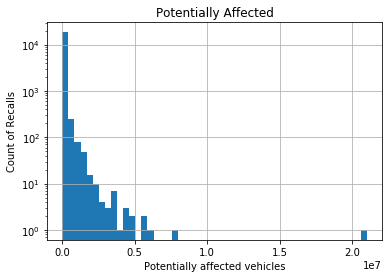

In [15]:
#Histogram to plot distribution of potential affected vehicles
df.hist(['Potentially Affected'], bins = 50, log=True);
plt.ylabel("Count of Recalls")
plt.xlabel("Potentially affected vehicles")

#Notice: Extreme outlier with >2Million vehicles affected by Ford in 1981
#Topic: THE PARKING GEAR MAY NOT BE SECURELY ENGAGED AFTER THE OPERATOR HAS ATTEMPTED TO SHIFT TO PARK. THE VEHICLE MAY APPEAR TO BE IN PARK THOUGH ACTUALLY IN REVERSE."

Text(0, 0.5, 'Number Recalls')

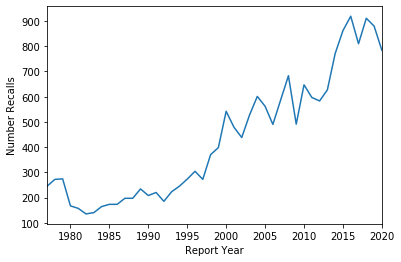

In [16]:
#Plot number of Recalls over report year 
recalls_per_year = df.groupby(by=["Report Year"])['NHTSA ID'].count().plot()
plt.ylabel("Number Recalls")

#Notice drop off in Year 2021 due to Data download date in Aug 2021 - so not full year 2021 data yet

Text(0.5, 0, 'Report Year & Month')

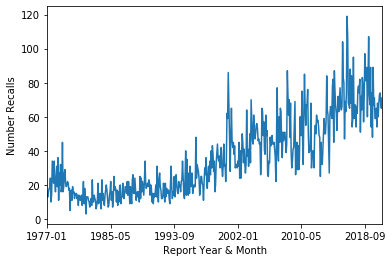

In [17]:
#Plot number of Recalls over report years - Data is pulled in Aug 2021 - so not surprising that last year is lower amount
recalls_per_year = df.groupby(by=['Year Month'])['NHTSA ID'].count().plot()
plt.ylabel("Number Recalls")
plt.xlabel("Report Year & Month")

Text(0, 0.5, 'Number of potentially affected vehicles')

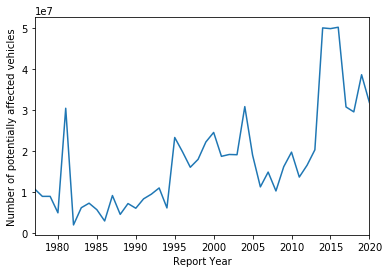

In [18]:
#Plot number of potentially affected vehicles over report years
pot_affected_per_year = df.groupby(by=["Report Year"])['Potentially Affected'].sum().plot()
plt.ylabel("Number of potentially affected vehicles")

Text(0, 0.5, 'Number of potentially affected vehicles')

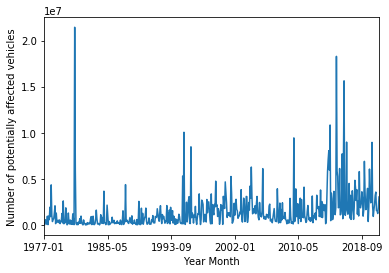

In [19]:
#Plot number of potentially affected vehicles over report years per month
pot_affected_per_year = df.groupby(by=['Year Month'])['Potentially Affected'].sum().plot()
plt.ylabel("Number of potentially affected vehicles")

In [20]:
#Potentially affected vehicles per component
pot_affected_per_component = df.groupby(by=['Component'])['Potentially Affected'].sum().sort_values(ascending = False).nlargest(10)
pot_affected_per_component

Component
AIR BAGS                     128167934.0
ELECTRICAL SYSTEM             80229750.0
FUEL SYSTEM, GASOLINE         65805620.0
POWER TRAIN                   65211742.0
SEAT BELTS                    54710448.0
SERVICE BRAKES, HYDRAULIC     45031526.0
VEHICLE SPEED CONTROL         39684534.0
SUSPENSION                    36368221.0
ENGINE AND ENGINE COOLING     33408941.0
EXTERIOR LIGHTING             32846707.0
Name: Potentially Affected, dtype: float64

In [21]:
#Count recalls per component 
recalls_per_component = df.groupby(by=['Component'])['NHTSA ID'].count().sort_values(ascending = False).nlargest(10)
recalls_per_component

Component
EQUIPMENT                    2587
ELECTRICAL SYSTEM            1677
STEERING                     1245
SERVICE BRAKES, HYDRAULIC    1121
FUEL SYSTEM, GASOLINE        1112
SUSPENSION                   1106
POWER TRAIN                   967
STRUCTURE                     959
ENGINE AND ENGINE COOLING     887
SERVICE BRAKES, AIR           814
Name: NHTSA ID, dtype: int64

In [22]:
#Count recalls per manufacturer 
recalls_per_OEM = df.groupby(by=['Manufacturer'])['NHTSA ID'].count().sort_values(ascending = False).nlargest(50)
recalls_per_OEM

#Very interesting insight: Over 1500 different companies have recalled vehicles including: 
#Cars & light trucks, freight trucks, recreational vehicles, motorcycles, trailers & campers and others.

Manufacturer
General Motors, LLC                         1284
Ford Motor Company                          1093
Chrysler (FCA US, LLC)                       914
BMW of North America, LLC                    426
Forest River, Inc.                           408
Daimler Trucks North America, LLC            382
Volkswagen Group of America, Inc.            379
Honda (American Honda Motor Co.)             357
Blue Bird Body Company                       334
PACCAR Incorporated                          332
Nissan North America, Inc.                   321
FREIGHTLINER LLC                             310
Navistar, Inc.                               304
Mercedes-Benz USA, LLC                       300
Mack Trucks, Inc.                            288
Toyota Motor Engineering & Manufacturing     252
Jayco, Inc.                                  215
Volvo Trucks North America                   199
Shyft Group                                  196
Winnebago Industries, Inc.                   193
Keyston

In [23]:
#Create new Software column that is True for all rows containing 'software' as part of their 'Recall Description'
df["Software"] = df["Recall Description"].str.contains("software|Software|SOFTWARE|program|PROGRAM|programming")

In [24]:
#Show whole column width 
pd.set_option('display.max_colwidth', -1)
#Print two columns Recall Description & new column Software to cross check results
df[["Recall Description","Software"]].head(100)

#Note: .tail() shows last rows which shows that this description was may not recorded for older recalls

,Recall Description,Software
635,"Yamaha Motor Corporation, USA (Yamaha) is recalling certain 2018-2020 MTT9GT (Tracer GT), 2019 MXTGTKL (NIKEN GT), 2017-2020 MT10, 2018-2020 XTZ12 (Super T�n�r�), 2013-2020 FJR13, 2018 XV19B (Star Eluder), and 2018-2021 XV19 (Star Venture) motorcycles. The front brake switch can fail due to increased resistance from silicon oxide.",False
637,"Marion Body Works Inc. is recalling certain 2020 Spartan Gladiator and MetroStar vehicles equipped with Weldon V-Mux Vista IV Standard LCD displays used for controlling emergency vehicle lighting and HVAC functions. These displays may experience low voltage spikes, and cause the LCD display to lock up or become nonfunctional, due to varying electrical installations.",False
638,"Yamaha Motor Corporation, USA (Yamaha) is recalling certain 2016-2020 Yamaha FJR13A and FJR13AE motorcycles. The second gear of the transmission can crack and break under high speed loads.",False
639,"Navistar, Inc. (Navistar) is recalling certain 2019-2021 International MV, 2020-2021 International HV, 2014-2020 International DuraStar and 2015-2018 International WorkStar vehicles. When the parking brake is applied and the automatic transmission is still in the drive or reverse position and the stationary PTO switch is engaged by the operator, the engine may rev and overcome the parking brake's ability to keep the vehicle from moving.",False
640,"General Motors, LLC (GM) is recalling certain 2020 Chevrolet Bolt EV and 2021 GMC Canyon and Sierra 1500, 2500 and 3500, Yukon, Yukon XL, Cadillac Escalade and Escalade ESV and Chevrolet Blazer, Camaro, Colorado, Equinox, Silverado 1500, 2500 and 3500, Suburban and Tahoe vehicles. Incorrect bolts may have been used at one or more fastening locations to secure the seat belts to the vehicle. If an incorrect bolt was used, the seat belt may not be properly attached to the vehicle.",False
...,...,...
739,"Thor Motor Coach (TMC) is recalling certain 2021 Four Winds motorhomes, equipped with Dometic 3 burner cooking stoves. The saddle valve securing bolt may be overtightened, possibly damaging the o-ring seal and causing a continuous gas leak.",False
740,"Volkswagen Group of America, Inc. (Volkswagen) is recalling certain 2021 Atlas Cross Sport, Tiguan LWB, Jetta NF, Jetta GLI, Golf GTI, Atlas FL and Arteon vehicles. The rear view camera could malfunction during an ignition cycle, leading to a black screen or infotainment system freeze. As such, these vehicles fail to comply with the requirements of Federal Motor Vehicle Safety Standard number 111, ""Rear Visibility.""",False
741,"Keystone RV Company (Keystone) is recalling certain 2019-2021 Outback 335CG and 340BH recreational trailers. A section of the frame rail may have inadequate support where the draw bar is attached, allowing the frame rail to buckle.",False
742,"Automobili Lamborghini (Lamborghini) is recalling certain 2019-2020 Urus vehicles. High temperatures in the engine compartment may damage the fuel line quick connector, possibly resulting in a fuel leak.",False


In [25]:
#CRISP-DM Step4&5: No Modelling is necessary for the three business questions
#Next step: Evaluation & Analyzing the data to answere Business Questions

In [26]:
#1. Question: What are the Top5 biggest recalls by number of affected vehicles?
df[['Manufacturer','Potentially Affected','Report Year', 'Recall Description']].nlargest(3, 'Potentially Affected')

#The top three Recalls by potentially affected vehicles are by Ford (2x) and Honda (1x).
#The failure modes are 

,Manufacturer,Potentially Affected,Report Year,Recall Description
21505,Ford Motor Company,21000000.0,1981,"THIS IS A MANUFACTURER""S NOTICE TO ADVISE OWNERS OF PROPER VEHICLE OPERATION. THE PARKING GEAR MAY NOT BE SECURELY ENGAGED AFTER THE OPERATOR HAS ATTEMPTED TO SHIFT TO PARK. THE VEHICLE MAY APPEAR TO BE IN PARK THOUGH ACTUALLY IN REVERSE. THIS COULD ALLOW THE VEHICLE TO MOVE UNEXPECTEDLY."
17768,Ford Motor Company,7900000.0,1996,THE IGNITION SWITCH COULD EXPERIENCE AN INTERNAL SHORT CIRCUIT.
6047,Honda (American Honda Motor Co.),6281043.0,2015,"Honda (American Honda Motor Co.) is recalling certain model year 2001-2007 Accord, 2001-2005 Civic, 2001-2004 Honda Civic GX, 2003-2005 Honda Civic Hybrid, 2002-2006 CR-V, 2003-2011 Element, 2002-2004 Odyssey, 2003-2008 Pilot, 2006 Ridgeline, 2003 Acura 3.2CL, 2003-2006 Acura MDX, and 2002-2003 Acura 3.2TL vehicles. The affected vehicles are equipped with a dual-stage driver frontal air bag that may be susceptible to moisture intrusion and other factors, including manufacturing variability that, over time, could cause the inflator to rupture."


Text(0, 0.5, ' Software related recalls')

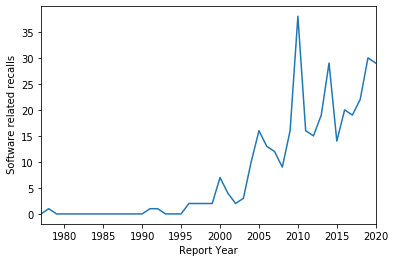

In [27]:
#2. Question: How many software related recalls happen and how does it compare over time? 
#Plot Software related recalls over Time
software_recalls = df.groupby(by=['Report Year'])['Software'].sum()
software_recalls.plot();
plt.ylabel(" Software related recalls")

#Software related claims only really start happening since the mid-90s when more computers and software was slowly integrated in the vehicles

Text(0, 0.5, ' Software related recalls [%]')

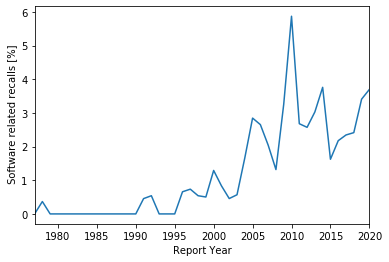

In [28]:
# #Question #2: Analyze Software related recalls as percentage of all recalls per year
software_recalls_percent = software_recalls/df.groupby(by=['Report Year'])['NHTSA ID'].count()
(software_recalls_percent*100).plot();
plt.ylabel(" Software related recalls [%]")

#Possible To Do: Include second axis to show how market has grown in same time

In [29]:
#Question #3 
#Filter dataset to contain only Top 18 brands by merging
#Calc average amount of recalls per year & produced vehicles for market


#Plot Recalls as ppm over time for each manufacturer

In [30]:
#Create Dataframe with sum of recalls grouped for all manufacturers and years
df_passenger_vehicles = df.groupby(by=['Manufacturer','Report Year'])['NHTSA ID'].count().reset_index()
df_passenger_vehicles = df_passenger_vehicles.rename(columns={"NHTSA ID": "Recalls"})
df_passenger_vehicles 

,Manufacturer,Report Year,Recalls
0,"4-Star Trailers, Inc.",2006,1
1,"4-Star Trailers, Inc.",2007,1
2,"4-Star Trailers, Inc.",2012,1
3,"4-Star Trailers, Inc.",2017,1
4,"4-Star Trailers, Inc.",2019,1
...,...,...,...
5642,Zero Motorcycles Inc.,2017,3
5643,Zero Motorcycles Inc.,2018,1
5644,Zero Motorcycles Inc.,2020,2
5645,"Zhejiang Xingyue Vehicle Co., Ltd.",2010,1


In [31]:
#Unpivot Dataframe containing marketshare information
df_unpivoted_marketshare = df_marketshare.melt(id_vars=['Manufacturer'], var_name='Year', value_name='Marketshare')
df_unpivoted_marketshare

,Manufacturer,Year,Marketshare
0,"General Motors, LLC",2020,19.10
1,Ford Motor Company,2020,12.46
2,Toyota Motor Engineering & Manufacturing,2020,14.51
3,"Chrysler (FCA US, LLC)",2020,12.43
4,Honda (American Honda Motor Co.),2020,10.83
...,...,...,...
1093,"Mitsubishi Motors North America, Inc.",1960,0.00
1094,"Volvo Car USA, LLC",1960,0.19
1095,"Jaguar Land Rover North America, LLC",1960,0.00
1096,"Porsche Cars North America, Inc.",1960,0.00


In [32]:
#Change Year column with type object to int
df_unpivoted_marketshare['Year'] = pd.to_numeric(df_unpivoted_marketshare['Year'], errors='coerce')

In [33]:
#Merge / Join marketsize on dataframe with marketshare information
df_market_n_share = df_unpivoted_marketshare.merge(df_market, left_on='Year', right_on='Year', how='left')


In [34]:
#Drop rows without info about market size (Before 1976)
df_market_n_share.dropna(axis = 0, inplace=True)

#Calculate amount of units per manufacturer in each year [1000 vehicles]
df_market_n_share['Units'] = df_market_n_share['Units']*df_market_n_share['Marketshare']/100
df_market_n_share

,Manufacturer,Year,Marketshare,Units
0,"General Motors, LLC",2020,19.10,2842.2710
1,Ford Motor Company,2020,12.46,1854.1726
2,Toyota Motor Engineering & Manufacturing,2020,14.51,2159.2331
3,"Chrysler (FCA US, LLC)",2020,12.43,1849.7083
4,Honda (American Honda Motor Co.),2020,10.83,1611.6123
...,...,...,...,...
805,"Mitsubishi Motors North America, Inc.",1976,0.00,0.0000
806,"Volvo Car USA, LLC",1976,0.31,41.2145
807,"Jaguar Land Rover North America, LLC",1976,0.00,0.0000
808,"Porsche Cars North America, Inc.",1976,0.13,17.2835


In [35]:
#Join dataframe with recalls per manufacturer & year with dataframe with produced units [1000 vehicles]
df_final = df_passenger_vehicles.merge(df_market_n_share, left_on=['Manufacturer','Report Year'], right_on=['Manufacturer','Year'], how='left') 
df_final 

,Manufacturer,Report Year,Recalls,Year,Marketshare,Units
0,"4-Star Trailers, Inc.",2006,1,NaN,NaN,NaN
1,"4-Star Trailers, Inc.",2007,1,NaN,NaN,NaN
2,"4-Star Trailers, Inc.",2012,1,NaN,NaN,NaN
3,"4-Star Trailers, Inc.",2017,1,NaN,NaN,NaN
4,"4-Star Trailers, Inc.",2019,1,NaN,NaN,NaN
...,...,...,...,...,...,...
5642,Zero Motorcycles Inc.,2017,3,NaN,NaN,NaN
5643,Zero Motorcycles Inc.,2018,1,NaN,NaN,NaN
5644,Zero Motorcycles Inc.,2020,2,NaN,NaN,NaN
5645,"Zhejiang Xingyue Vehicle Co., Ltd.",2010,1,NaN,NaN,NaN


In [36]:
#Drop rows without info about market size
df_final.dropna(axis = 0, inplace=True)
df_final['Recalls ppm'] = df_final['Recalls']/(df_final['Units']*1000)*1000000
df_final.head(70)

,Manufacturer,Report Year,Recalls,Year,Marketshare,Units,Recalls ppm
333,"BMW of North America, LLC",1977,4,1977.0,0.20,29.7180,134.598560
334,"BMW of North America, LLC",1978,3,1978.0,0.24,37.0104,81.058297
335,"BMW of North America, LLC",1979,1,1979.0,0.32,45.2768,22.086367
336,"BMW of North America, LLC",1980,1,1980.0,0.39,44.7291,22.356810
337,"BMW of North America, LLC",1982,3,1982.0,0.48,50.6016,59.286663
...,...,...,...,...,...,...,...
823,"Chrysler (FCA US, LLC)",2000,30,2000.0,14.16,2522.1792,11.894476
824,"Chrysler (FCA US, LLC)",2001,30,2001.0,13.01,2273.2373,13.197038
825,"Chrysler (FCA US, LLC)",2002,18,2002.0,12.87,2205.6606,8.160820
826,"Chrysler (FCA US, LLC)",2003,19,2003.0,12.54,2127.6618,8.929991


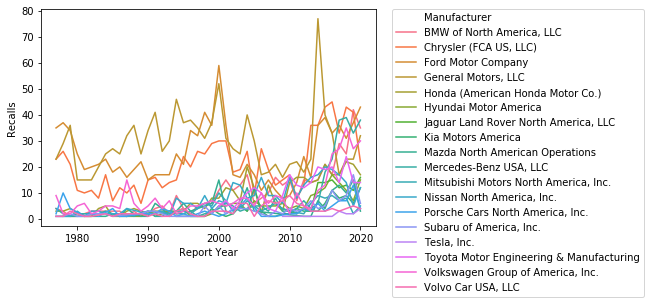

In [37]:
#Absolut recalls over time
sns.lineplot(data=df_final, x="Report Year", y="Recalls", hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

''

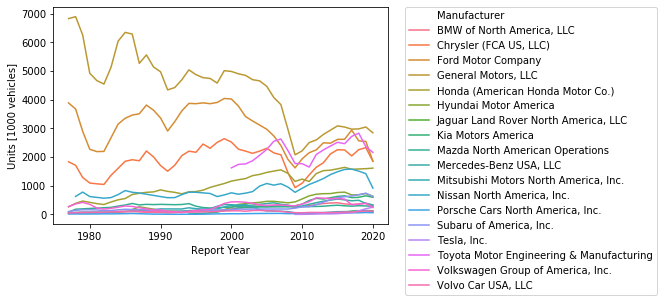

In [38]:
#Absolut recalls over time
sns.lineplot(data=df_final, x="Report Year", y="Units", hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Units [1000 vehicles]")
;

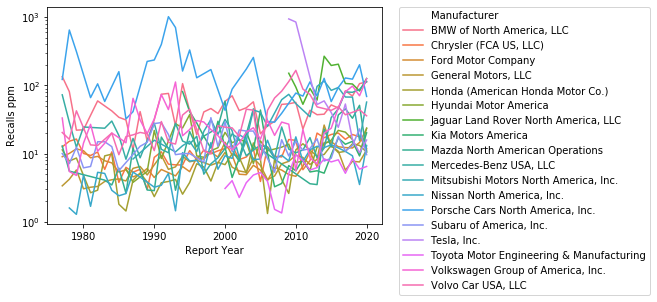

In [39]:
#Plot Recalls [part per million] produced Units over time
recalls_abs = sns.lineplot(data=df_final, x="Report Year", y="Recalls ppm", hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
recalls_abs.set(yscale='log');

''

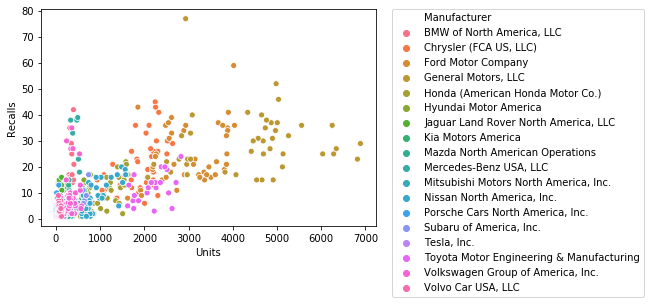

In [40]:
#No real trend visible over manufacturers, other than their market share in Units
manufacturers = sns.scatterplot(data=df_final, x="Units", y="Recalls", hue='Manufacturer')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
;

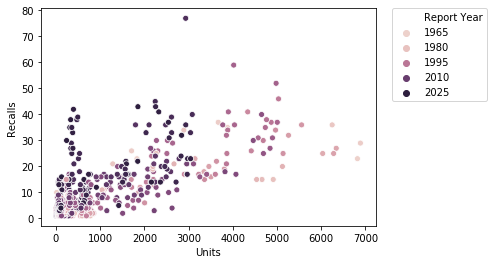

In [41]:
#No real trend visible over time
report_year = sns.scatterplot(data=df_final, x="Units", y="Recalls", hue='Report Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [42]:
df_final.sort_values(by=['Recalls ppm'], inplace=True, ascending=False)
df_final

,Manufacturer,Report Year,Recalls,Year,Marketshare,Units,Recalls ppm
3969,"Porsche Cars North America, Inc.",1992,4,1992.0,0.03,3.9321,1017.268126
4820,"Tesla, Inc.",2009,1,2009.0,0.01,1.0602,943.218261
4821,"Tesla, Inc.",2010,1,2010.0,0.01,1.1773,849.401172
3970,"Porsche Cars North America, Inc.",1993,3,1993.0,0.03,4.2558,704.920344
3958,"Porsche Cars North America, Inc.",1978,10,1978.0,0.10,15.4210,648.466377
...,...,...,...,...,...,...,...
3607,"Nissan North America, Inc.",1993,1,1993.0,4.85,688.0210,1.453444
2253,Honda (American Honda Motor Co.),1986,1,1986.0,4.25,693.5150,1.441930
4923,Toyota Motor Engineering & Manufacturing,2008,3,2008.0,16.47,2222.2971,1.349955
2273,Honda (American Honda Motor Co.),2006,2,2006.0,8.85,1508.8365,1.325525


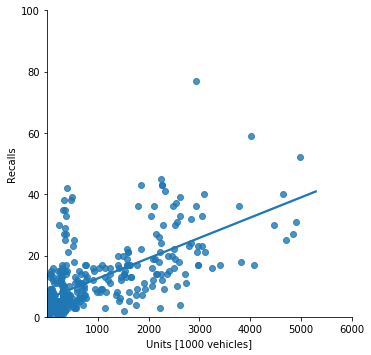

In [60]:
#Over all slight correlation between Units and Recalls
corr = sns.lmplot(data=df_final, x="Units", y="Recalls", ci=None)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#corr.set(yscale='log')
#corr.set(xscale='log')
corr.set(xlim=(1, 6000))
corr.set(ylim=(0, 100));
plt.xlabel("Units [1000 vehicles]");

#Record holder for most recalls per year: General Motors, LLC with 77 Recalls in 2014

In [ ]:
#Give groups of smnall / medium / large automotive companies based on yearly units. Defined by quartile range 
#conditions = [
#    (df_final['Marketshare'] > 9.3),
#    (df_final['Marketshare'] < 3)
#    ]
#choices = ['Large', 'Small']
#df_final['Company Size'] = np.select(conditions, choices, default='Medium')
#df_final

In [44]:
df_final = df_final[(df_final['Report Year'] >= 2000)]

In [62]:
df_top = df_final.groupby(by=['Manufacturer'])['Recalls'].median().round(1).sort_values(ascending = False).reset_index()
df_top

,Manufacturer,Recalls
0,"Chrysler (FCA US, LLC)",26.0
1,"General Motors, LLC",23.0
2,Ford Motor Company,21.0
3,"BMW of North America, LLC",15.0
4,Honda (American Honda Motor Co.),14.0
5,"Nissan North America, Inc.",13.0
6,Toyota Motor Engineering & Manufacturing,12.0
7,"Jaguar Land Rover North America, LLC",11.5
8,"Volkswagen Group of America, Inc.",8.0
9,"Mitsubishi Motors North America, Inc.",6.0


In [61]:
df_top_rel = df_final.groupby(by=['Manufacturer'])['Recalls ppm'].median().round(1).sort_values(ascending = False).reset_index()
df_top_rel

,Manufacturer,Recalls ppm
0,"Jaguar Land Rover North America, LLC",105.8
1,"Porsche Cars North America, Inc.",82.6
2,"Mitsubishi Motors North America, Inc.",54.2
3,"BMW of North America, LLC",51.8
4,"Tesla, Inc.",46.2
5,"Volvo Car USA, LLC",43.7
6,"Volkswagen Group of America, Inc.",22.6
7,Mazda North American Operations,19.3
8,Hyundai Motor America,14.1
9,"Mercedes-Benz USA, LLC",13.3


In [55]:
#Reduce dataframe to only contain top three manufactureres by highest median recalls/units
df_top = df_top.nlargest(3, 'Recalls ppm')
df_reduced = df_final[(df_final['Manufacturer'].isin(df_top['Manufacturer']))]

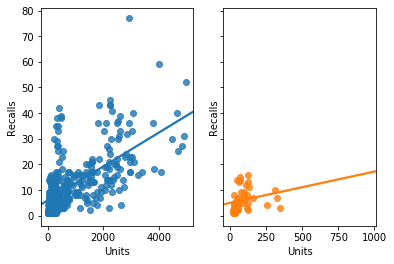

In [57]:
#Check where the three worst performing manufacturer locate in the correlation plot between 
#units and recalls: All three rather low amount
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x=df_final['Units'], y=df_final['Recalls'], ax=ax1, ci=None)
sns.regplot(x=df_reduced['Units'], y=df_reduced['Recalls'], ax=ax2, ci=None);

''

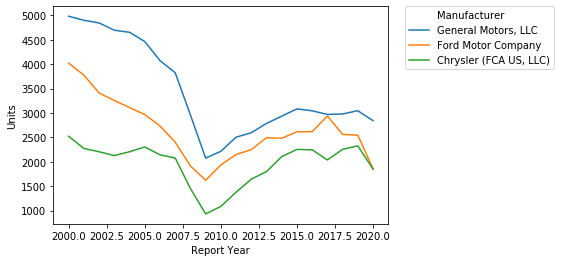

In [48]:
#Plot Recalls [part per million] produced Units over time
recalls_year = sns.lineplot(data=df_reduced, x="Report Year", y="Units", hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
;

''

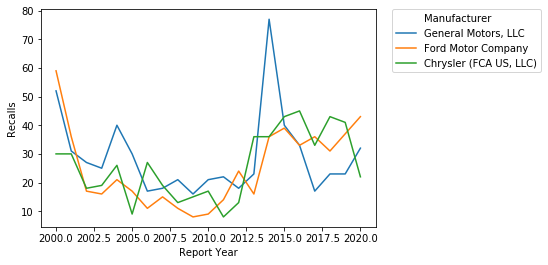

In [49]:
#Plot Recalls [part per million] produced Units over time
recalls_year = sns.lineplot(data=df_reduced, x="Report Year", y="Recalls", hue="Manufacturer")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
;

In [50]:
#Final question answered: Question: How does the performance of different passenger vehicle manufacturers adjusted by their market share?
#There is a clear correlation between recalls and produced units, although it is growing not as much as might be suspected.
#The highest relative recalls per units in the US has therefore smaller companies such as Porsche, Tesla and JLR. 
#From first hand experience as a quality engineer at a automotive supplier this makes sense.
#The larger the projects/units, the more automation is used in producing all involved parts. 
#Humans make mistakes and therefore more manual steps increase the chance for safety relevant faults.

#What are your key takeaways? What do you think would be interesting to further analyze?


In [51]:
#All findings are communicated through a Medium blogpost to a non-technical audience